# AIGP Task A2

Imagine you are given a task by your game company to create an intelligent NPC. You would like to train a machine learning model that acts as the brain of your NPC. Instead of deciding according to a table, now it must decide like a human so that it can interact realistically with a human player. If your NPC (with a machine learning brain) has inputs and outputs as follows:
 
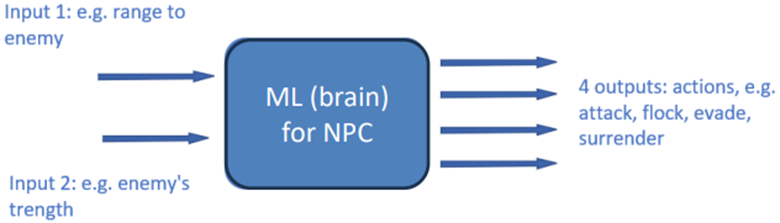
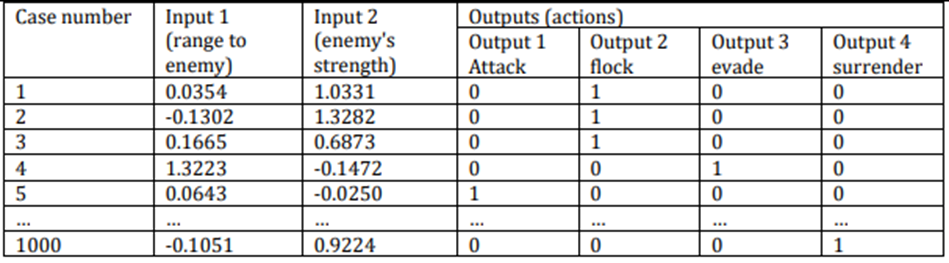

## Task A2.1 
Conduct your own independent literature survey to identify one possible machine learning method, apart from ANN, which can be used to learn and imitate players' behaviours. Explain your justification for why you choose the method.


## Task A2.2 
Systematically evaluate the method in 2.1, in comparison to ANNs. Note that in this task, you theoretically evaluate and analyse the techniques based on your literature survey. You do not need to implement the methods.


Systematic evaluation of a method involves a structured approach to assess its effectiveness, strengths, weaknesses, and suitability for your specific needs. The process can be broken down into several key steps:

1. Define your goals and objectives:

What are you trying to achieve with the method?
What are the desired outcomes?
What questions do you want to answer through the evaluation?
Having clear goals helps you choose appropriate evaluation criteria and methods.

2. Select evaluation criteria:

Relevance: Does the method address your specific needs and context?
Effectiveness: Does it achieve the desired outcomes?
Efficiency: Does it achieve the outcomes with minimal resources and effort?
Accuracy: Does it provide reliable and valid results?
Feasibility: Can it be implemented realistically given your time, resources, and expertise?
Additional criteria: Depending on your context, consider factors like scalability, ethical implications, user experience, etc.
3. Choose an evaluation approach:

Quantitative methods: Use numerical data and statistical analysis to measure outcomes (e.g., surveys, experiments).
Qualitative methods: Explore experiences, perceptions, and context through interviews, observations, focus groups.
Mixed methods: Combine quantitative and qualitative methods for a more comprehensive understanding.
4. Collect data:

Gather data relevant to your chosen criteria and evaluation approach.
Ensure data collection is reliable, valid, and unbiased.
5. Analyze data:

Use appropriate methods to analyze quantitative and qualitative data.
Identify patterns, trends, and key findings.
6. Interpret results:

Draw conclusions about the method's effectiveness, strengths, and weaknesses.
Consider limitations of the evaluation and potential biases.
7. Report and share findings:

Communicate your evaluation results clearly and concisely to stakeholders.
Use findings to inform decisions about adopting, adapting, or refining the method.

## Task A2.3 
Develop a computer program to implement an ANN to learn the player's behaviour.

## Model Investigation

Below is an algorithm which systematically evaluates each combination of hyper parameter. This will allow me to evaluate which hyperparameters will peform the best for out player behaviour ANN

In [1]:
# Simple neural network using Keras
# Import the necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers as Optimizer
import pandas as pd
from datetime import datetime

# Initialise Dataset
X = [0.0354, 1.0331], [-0.1302, 1.3282], [0.1665, 0.6873], [1.3223, -.1472], [0.0643, -.0250], [-0.1051,.9224]
Y = [.0, 1.0,0.0,.0],[.0,1.0,.0,.0], [.0,1.0,.0,.0], [.0,.0,1.0,.0], [1.0,.0,.0,.0], [.0,.0,.0,1.0]

# Hyper Parameters - Removed temporarliy for debugging
ACT = ['relu', 'sigmoid', 'softmax', 'tanh', 'elu' ]
ACT_COUNT = len(ACT)

LR = [ 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0 ] # 0.001, 0.01, # # 0.0001, this is too small and takes too long to train
LR_COUNT = len(LR)

LOSS = [ 'binary_crossentropy', 'mean_squared_error' , 'huber_loss', 'kullback_leibler_divergence'] 
LOSS_COUNT = len(LOSS)

OPT = [ Optimizer.Adadelta, Optimizer.Adam, Optimizer.Adagrad, Optimizer.Nadam, Optimizer.RMSprop]
OPT_COUNT = len(OPT)

EPOCH = [25, 50, 100, 200] # 500, this is too large and takes too long to train
EPOCH_COUNT = len(EPOCH)

BATCH = [ 32, 64 ] #128, this is too large and takes too long to train
BATCH_COUNT = len(BATCH)

# Test Setup
testResult = []
testDP = 3
TEST_MAX = EPOCH_COUNT * (ACT_COUNT ** 2) * LR_COUNT * OPT_COUNT * LOSS_COUNT * BATCH_COUNT

# Run tests for hyper parameter combinations
for epoch_i in range(0, EPOCH_COUNT, 1):
    for act_i in range(0, ACT_COUNT, 1):
        for act_j in range(0, ACT_COUNT, 1):
            for lr_i in range(0, LR_COUNT, 1):
                for opt_i in range(0, OPT_COUNT,1):
                    for loss_i in range(0, LOSS_COUNT,1):
                        for batch_i in range(0, BATCH_COUNT,1):

                            # Current Model
                            model = Sequential()

                            # Add the first layer (input layer)
                            model.add(Dense(2, activation=ACT[act_i]))

                            # Add a second layer (hidden layer)
                            model.add(Dense(4, activation=ACT[act_i]))

                            # Add the output layer
                            model.add(Dense(4, activation=ACT[act_j]))

                            # Compile the model
                            model.compile(loss = LOSS[loss_i], optimizer = OPT[opt_i](learning_rate= LR[lr_i]), metrics = ['accuracy'])

                            # Train the model with epochs, batch size, and validation data
                            model.fit(X, Y, epochs=EPOCH[epoch_i], batch_size=BATCH[batch_i], verbose = 0)

                            # Evaluate the model testing set and get the loss and accuracy
                            loss, accuracy = model.evaluate(X,Y)

                            # Save test results
                            testResult.append({ 
                                'loss': round(loss, testDP),
                                'accuracy': round(accuracy, testDP),
                                'epochs': EPOCH[epoch_i],
                                'act_hid': ACT[act_i],
                                'act_out': ACT[act_j],
                                'learn rate': LR[lr_i],
                                'optimizer': model.optimizer.get_config()['name'],
                            })
                               
                            print('Test {}/{} complete'.format(len(testResult), TEST_MAX))

# Export test results to csv
dateTimeString = datetime.now().strftime("%d-%m-%Y %H-%M-%S")
pd.DataFrame(testResult).to_csv('Test Results/Test {}.csv'.format(dateTimeString), sep=',', index=False)

1/1 [==============================] - 0s 103ms/step - loss: 3.8562 - accuracy: 0.1667
Test 1/40000 complete
1/1 [==============================] - 0s 83ms/step - loss: 1.6490 - accuracy: 0.5000
Test 2/40000 complete
1/1 [==============================] - 0s 74ms/step - loss: 0.2318 - accuracy: 0.1667
Test 3/40000 complete
1/1 [==============================] - 0s 74ms/step - loss: 0.2491 - accuracy: 0.0000e+00
Test 4/40000 complete
1/1 [==============================] - 0s 81ms/step - loss: 0.1211 - accuracy: 0.3333
Test 5/40000 complete
1/1 [==============================] - 0s 79ms/step - loss: 0.1129 - accuracy: 0.5000
Test 6/40000 complete
1/1 [==============================] - 0s 79ms/step - loss: 4.8840 - accuracy: 0.1667
Test 7/40000 complete
1/1 [==============================] - 0s 79ms/step - loss: 13.7694 - accuracy: 0.0000e+00
Test 8/40000 complete
1/1 [==============================] - 0s 84ms/step - loss: 2.6708 - accuracy: 0.3333
Test 9/40000 complete
1/1 [=============

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Data
X = [0.0354, 1.0331], [-0.1302, 1.3282], [0.1665, 0.6873], [1.3223, -.1472], [0.0643, -.0250], [-0.1051,.9224]
Y = [.0, 1.0,0.0,.0],[.0,1.0,.0,.0], [.0,1.0,.0,.0], [.0,.0,1.0,.0], [1.0,.0,.0,.0], [.0,.0,.0,1.0]


# Create a Sequential model
model = Sequential()

# Add the first layer (input layer)
model.add(Dense(2, activation='relu'))

# Add a second layer (hidden layer)
model.add(Dense(4, activation='relu'))

# Add the output layer
model.add(Dense(4, activation='sigmoid'))

# Compile the model
# We'll use the binary crossentropy loss function, the Adam optimizer, and accuracy as the metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and y_train are your training data and labels
model.fit(X, Y, epochs=100, batch_size=32)

## Task A2.4 
Systematically design and conduct experiments to determine the optimal number of neurons and layers in the ANN suitable for this task.


## Task A2.5 
Evaluate the performance of your ANN.

The sample is too small to 100% say this ann is perfect.